# Mestrado 2023 - Implementações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from optimize import fit_data
import optimize
from new_wave import get_transition_points

In [2]:
# Import data
data = pd.read_csv("../Datasets/italy_regions.csv") 
city_name = 'Lombardia' #region 
indicator='ICU Admissions'

In [3]:
data.columns

Index(['Unnamed: 0', 'data', 'denominazione_regione', 'ricoverati_con_sintomi',
       'terapia_intensiva', 'totale_ospedalizzati', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'deceduti',
       'totale_casi', 'ingressi_terapia_intensiva'],
      dtype='object')

In [4]:
# Filtra região de interesse
data = data[data['denominazione_regione'] == city_name]

In [5]:
# Get daily indicator
daily_data = data['terapia_intensiva']

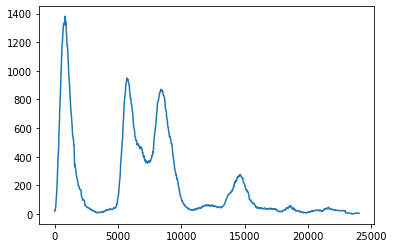

In [6]:
plt.plot(daily_data)

In [7]:
# Get cummulative indicator from daily data
acc_data = []
for i in range(len(daily_data)):
    acc_data.append(np.sum(daily_data[:i]))

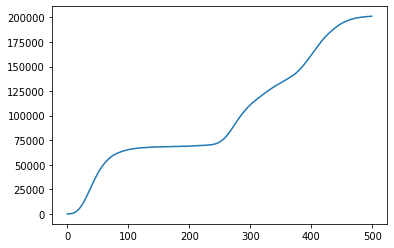

In [8]:
plt.plot(acc_data[:500])

In [9]:
# time array
t = np.linspace(0, len(acc_data)-1, len(acc_data))

normalized_acc_data = acc_data / max(acc_data)

#scaling_factor = 1000
scaling_factor = max(acc_data)/2
#scaling_factor = 1

acc_data = np.array(acc_data) / scaling_factor
daily_data = list(daily_data/ scaling_factor)

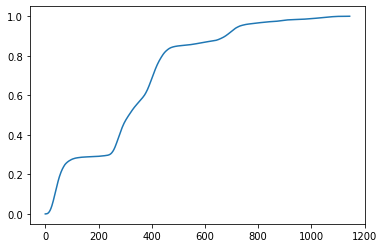

In [10]:
plt.plot(normalized_acc_data)

In [11]:
# Initial Conditions

def initial_cond_0(y_t):
    A0 = 2*max(y_t)
    tp0 = (2/3)*len(y_t)
    delta0 = (1/4)*len(y_t)
    nu0 = 1
    return [A0, tp0, delta0, nu0]

optimize.initial_cond = initial_cond_0

def update_cond_nw(A0, tp0):
    return [A0, tp0]
    
optimize.update_cond = update_cond_nw

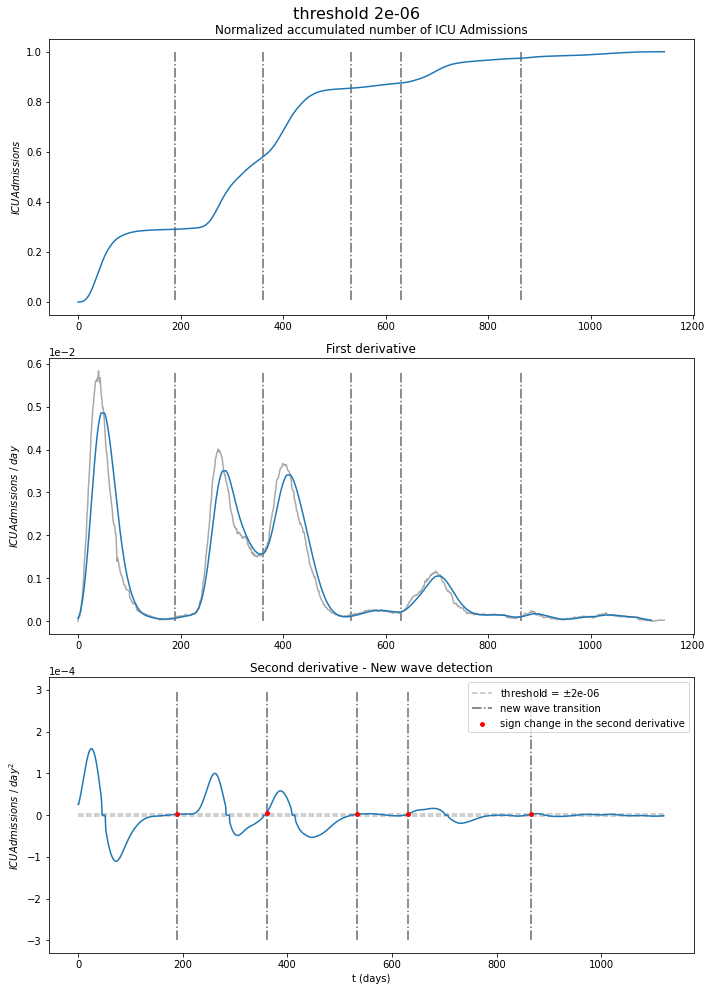

x_nw: [189, 361, 532, 630, 865]


In [12]:
# Transition Points
x_nw = get_transition_points(acc_data, visual=True, threshold=2e-6, indicator = indicator)
#x_nw = x_nw[1:6]

print('x_nw:', x_nw)

In [49]:
x_nw = [189, 361, 532, 630, 865, 1144]

### Ajuste do modelo utilizando ITSE_norm

/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #1 - A0:0.5724454657737633 | tp0:45.23727441388447 | delta0:14.220201222159098 | nu0:1.0 
(optimal) Sigmoid #1 - A0:0.5724454657737633 | tp0:45.23727441388447 | delta0:14.220201222159098 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #2 - A0:0.5281158984337463 | tp0:286.10265833961256 | delta0:17.48270847172381 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #2 - A0:0.5281158984337463 | tp0:286.10265833961256 | delta0:17.48270847172381 | nu0:1.0 
Sigmoid #3 - A0:0.5393530223718314 | tp0:408.98527779483106 | delta0:19.102985031781472 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #3 - A0:0.5393530223718314 | tp0:408.98527779483106 | delta0:19.102985031781472 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #4 - A0:0.32896118149964065 | tp0:681.0136187207669 | delta0:33.22391363076212 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #4 - A0:0.32896118149964065 | tp0:681.0136187207669 | delta0:33.22391363076212 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #5 - A0:0.1795598708091929 | tp0:700.3682577787904 | delta0:21.74331859327382 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #5 - A0:0.1795598708091929 | tp0:700.3682577787904 | delta0:21.74331859327382 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #6 - A0:0.06345644107255345 | tp0:979.1317815987862 | delta0:62.44796335444989 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


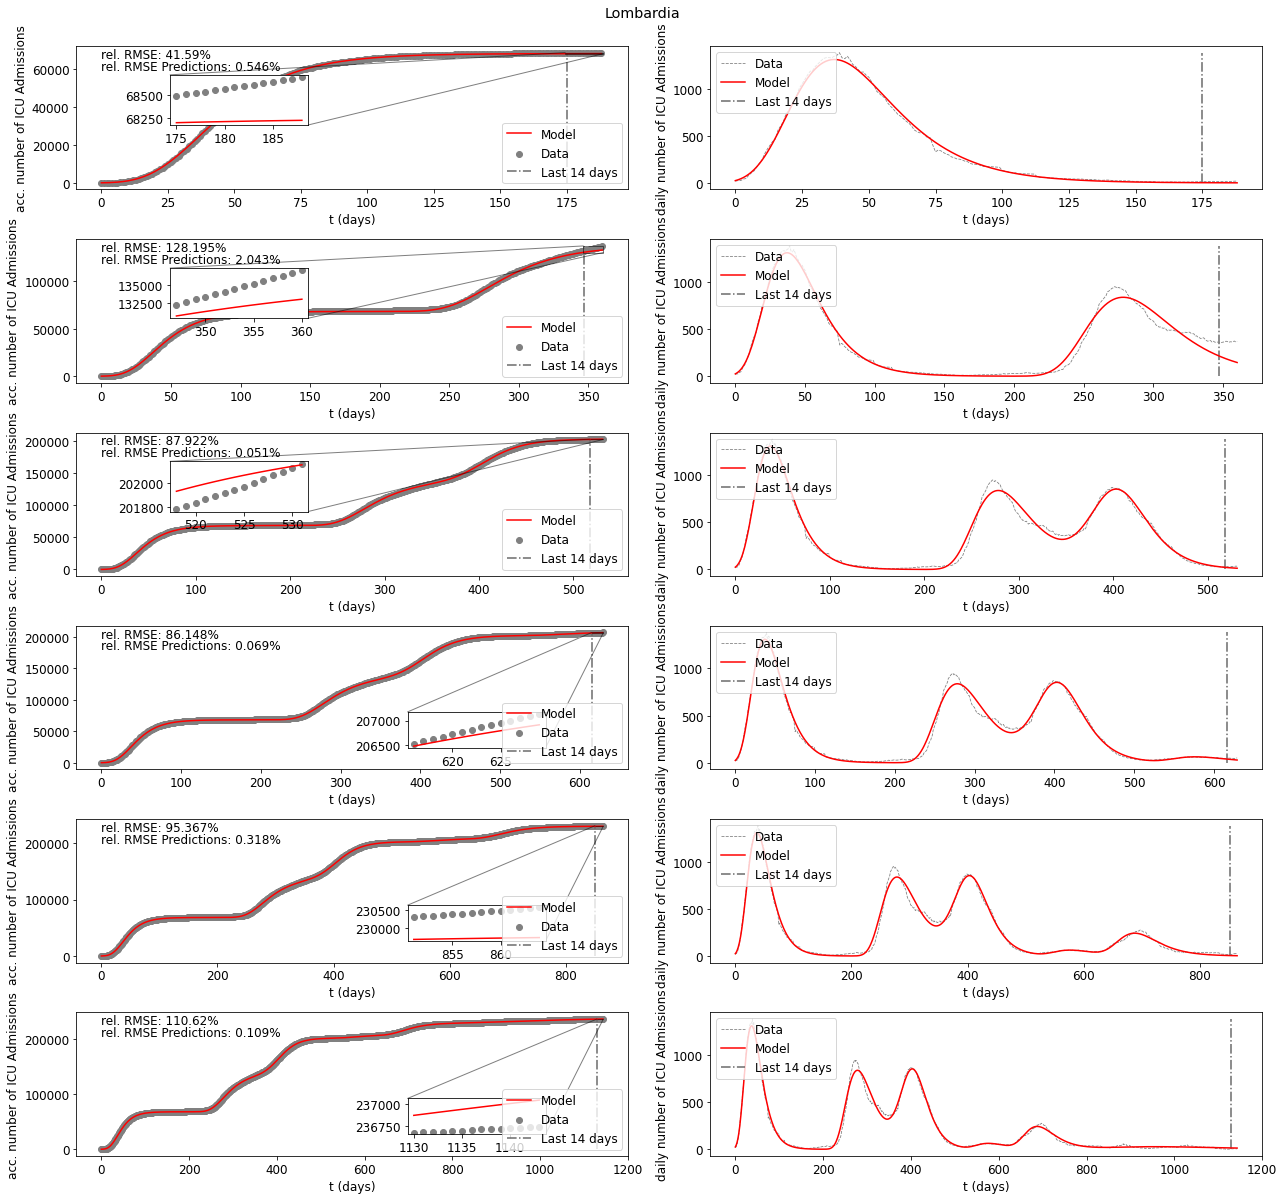

In [50]:
sig_params, rel_rmse_list, y_m = optimize.fit_data(acc_data, 
                               daily_data, 
                               city_name, 
                               x_nw, 
                               indicator = indicator, 
                               n_weeks_pred = 2,
                               scaling_factor = scaling_factor,
                               loss_function = 'ITSE'
                            )

In [58]:
data['data'].to_list()[1130]

'2023-03-30T17:00:00'